In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
name = 'seasia_geno_all'
infile = '../southeast_asia/genotype/all_effects/seasia_genotypes_fullTree_model_performance.csv'
model_performance = pd.read_csv(infile, index_col=0)

fit_params = ['DENV1_f0','DENV2_f0','DENV3_f0','beta', 'gamma', 'sigma']
metrics = ['abs_error', 'accuracy', 'beta', 'delta_sse', 'information_gain', 'pearson_r2', 'spearman_r']

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Best fit (optimizing delta_sse):
DENV1_f0             1.400000
DENV2_f0             0.800000
DENV3_f0             0.400000
abs_error            0.115843
accuracy             0.705793
beta                 1.714286
delta_sse           14.216181
gamma                0.571429
information_gain    12.887730
pearson_r2           0.279513
sigma                0.428571
spearman_r           0.346527
Name: 59881, dtype: float64


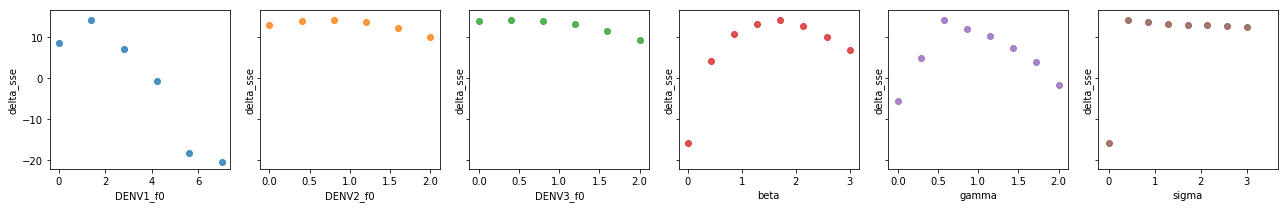

Best fit (optimizing pearson_r2):
DENV1_f0             1.400000
DENV2_f0             1.600000
DENV3_f0             0.400000
abs_error            0.124197
accuracy             0.692073
beta                 1.285714
delta_sse           11.152962
gamma                0.571429
information_gain    19.724304
pearson_r2           0.332059
sigma                0.428571
spearman_r           0.324825
Name: 45637, dtype: float64


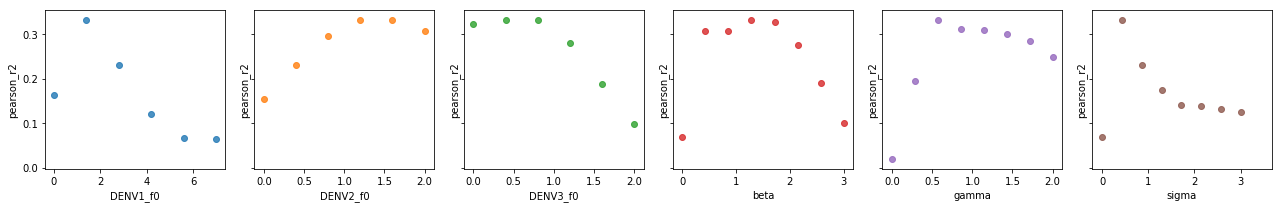

In [4]:
def plot_profile_likelihoods(model_performance, metric):

    if metric == 'abs_error':
        best_fit = model_performance.ix[model_performance[metric].idxmin()]
    else:
        best_fit = model_performance.ix[model_performance[metric].idxmax()]
    print 'Best fit (optimizing %s):\n'%metric, best_fit
    
    fig, axes = plt.subplots(ncols=len(fit_params), nrows=1, figsize=(3*len(fit_params), 3), sharey=True)
    for profile_param,ax in zip(fit_params, axes):
        
        fixed_params = [p for p in fit_params if p != profile_param]
        
        plot_data = model_performance
        for fp in fixed_params:
            plot_data = plot_data.loc[plot_data[fp] == best_fit[fp]]
        
        sns.regplot(profile_param, metric, data=plot_data, fit_reg=False, ax=ax)
        ax.set_xlabel(profile_param)
        ax.set_ylabel(metric)
        
    plt.tight_layout()
    plt.savefig('../profile-likelihoods/%s_%s_perf.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_fit

    
delta_sse = plot_profile_likelihoods(model_performance, 'delta_sse')
r2 = plot_profile_likelihoods(model_performance, 'pearson_r2')

In [9]:
def generate_table(best_fit, metric, genres, antres):
    fit_dict = best_fit.to_dict()
    fit_dict['DENV4_f0'] = 0.0
    
    if metric == 'delta_sse':
        metric_str = '$\Delta$ SSE'
    elif metric == 'pearson_r2':
        metric_str = 'Pearson $R^2$'
    else:
        metric_str = metric.capitalize()
    metadata = ' & '.join([genres.capitalize(), antres.capitalize(), metric_str, '%.2f'%fit_dict[metric]])
    params = ' & '.join(['%.2f'%fit_dict[param] for param in ['beta', 'gamma', 'sigma', 'DENV1_f0', 'DENV2_f0', 'DENV3_f0', 'DENV4_f0']])
    print(metadata+' & '+params + r' \\ ')
    
generate_table(delta_sse, 'delta_sse', 'Genotype', 'Interserotype')
generate_table(r2, 'pearson_r2', 'Genotype', 'Interserotype')

Genotype & Interserotype & $\Delta$ SSE & 14.83 & 2.57 & 0.57 & 0.86 & 5.71 & 4.57 & 3.57 & 0.00 \\ 
Genotype & Interserotype & Pearson $R^2$ & 0.36 & 2.57 & 0.57 & 0.86 & 5.71 & 5.71 & 2.86 & 0.00 \\ 
